In [1]:
import processing.vocabulary_stats as vs
import warnings
import yaml
from utils.utils import fetch_import_module
import seaborn as sns
import pandas as pd
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000) 
sns.set_style("dark", {'axes.grid' : True, 'axes.linewidth':1})

[nltk_data] Downloading package punkt to /home/tobias/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/tobias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/home/tobias/anaconda3/envs/biaspaper/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to /home/tobias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 2. Semantic Perspective


## Data loading

In [2]:
config = yaml.safe_load(open("config.yaml"))

In [3]:
dataset_names = config['datasets']
data_sets_text, exclude = [], []
for dset in dataset_names:
    dset_module = fetch_import_module(dset)
    data_sets_text.append(dset_module.get_data())
    exclude.append(set(config['non-hate-label'][dset]))

## a) LSI-based intra-dataset class similarity
This method takes some time....

/home/tobias/Uni/SoSe2021/BiasJournalPaper/dataset-evaluation/processing/vocabulary_stats.py:291: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax.append(fig2.add_subplot(spec2[k, l]))


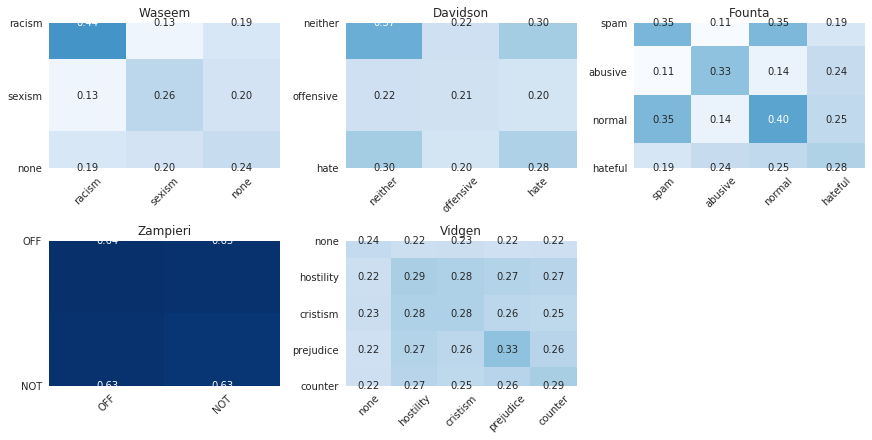

In [4]:
vs.plotIntraDatasetSimilarityMultiple("",dataset_names,data_sets_text,rows=2,cols=3,width=12,height=6)

## b) Word embedding based intra- and inter-dataset class similarity

6


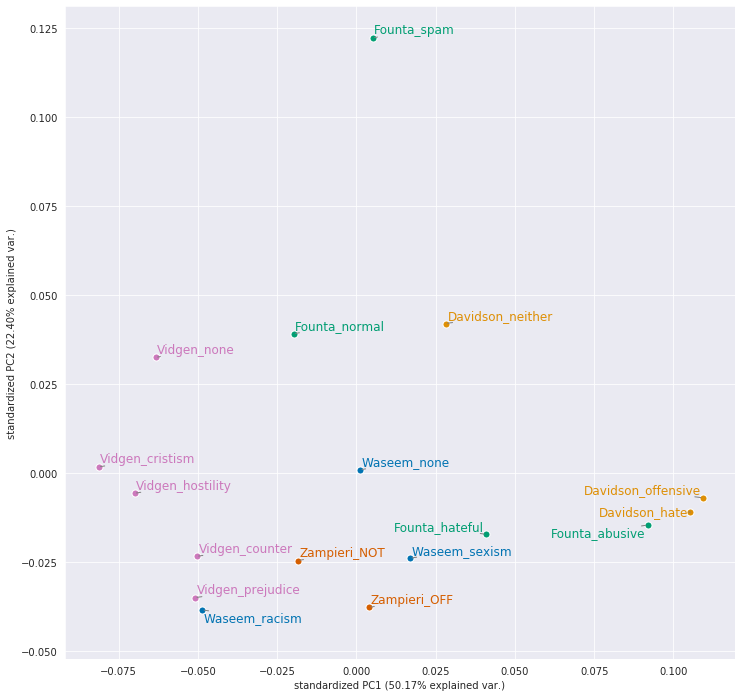

In [5]:
embedding_path = '../embeddings/cc.en.300.bin'
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    vs.getInterClassSimilarityMultiple(data_sets_text,dataset_names,embedding_path)

## c) TOP-10-Words of abusive classes with highest PMI 


In [6]:
df = vs.getTopWordOfClasses(data_sets_text, dataset_names, exclude, n=10, language='english')
df

,Waseem - sexism,Waseem - racism,Davidson - offensive,Davidson - hate,Founta - abusive,Founta - hateful,Founta - spam,Zampieri - OFF,Vidgen - cristism,Vidgen - hostility
0,sexist,islam,bitch,bitch,fucking,hate,amp,liberals,china,china
1,women,muslims,bitches,faggot,fucked,niggas,new,like,world,world
2,kat,muslim,hoes,like,like,fucking,free,control,chinese,chinese
3,girls,mohammed,like,ass,ass,nigga,get,gun,virus,virus
4,like,religion,pussy,nigga,bitch,like,video,people,people,people
5,call,jews,hoe,white,fuck,people,via,shit,ccp,ccp
6,female,prophet,ass,fuck,get,idiot,check,antifa,wuhan,us
7,men,isis,got,nigger,bad,get,win,get,outbreak,wuhan
8,think,quran,fuck,trash,shit,amp,today,conservatives,us,spread
9,woman,like,get,fucking,know,ass,gt,one,government,rt


In [7]:
df2 = df.T
df2['Words with highest PMI'] = df2[0] + ", " + df2[1] + ", " + df2[2] + ", " + df2[3] + ", " + df2[4] + ", " + df2[5] + ", " + df2[6] + ", " + df2[7] + ", " + df2[8] + ", " + df2[9]
df3 = df2.copy()
df3 = df3.drop([0,1,2,3,4,5,6,7,8,9], axis = 1) 
print(df3.to_latex())

\begin{tabular}{ll}
\toprule
{} &                                                        Words with highest PMI \\
\midrule
Waseem - sexism      &              sexist, women, kat, girls, like, call, female, men, think, woman \\
Waseem - racism      &  islam, muslims, muslim, mohammed, religion, jews, prophet, isis, quran, like \\
Davidson - offensive &                   bitch, bitches, hoes, like, pussy, hoe, ass, got, fuck, get \\
Davidson - hate      &          bitch, faggot, like, ass, nigga, white, fuck, nigger, trash, fucking \\
Founta - abusive     &                 fucking, fucked, like, ass, bitch, fuck, get, bad, shit, know \\
Founta - hateful     &              hate, niggas, fucking, nigga, like, people, idiot, get, amp, ass \\
Founta - spam        &                        amp, new, free, get, video, via, check, win, today, gt \\
Zampieri - OFF       &   liberals, like, control, gun, people, shit, antifa, get, conservatives, one \\
Vidgen - cristism    &    china, world, chin